In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('stores_sales_forecasting.csv')

# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')

In [2]:
# Display basic statistical description of numerical columns
print(data.describe())

            Row ID                     Order Date  \
count  2121.000000                           2121   
mean   5041.643564  2016-04-09 23:53:12.644978944   
min       1.000000            2014-01-03 00:00:00   
25%    2568.000000            2015-04-30 00:00:00   
50%    5145.000000            2016-05-14 00:00:00   
75%    7534.000000            2017-04-09 00:00:00   
max    9991.000000            2017-12-30 00:00:00   
std    2885.740258                            NaN   

                           Ship Date   Postal Code        Sales     Quantity  \
count                           2121   2121.000000  2121.000000  2121.000000   
mean   2016-04-18 20:43:47.439886848  55726.556341   349.834887     3.785007   
min              2014-01-04 00:00:00   1040.000000     1.892000     1.000000   
25%              2015-05-14 00:00:00  22801.000000    47.040000     2.000000   
50%              2016-06-08 00:00:00  60505.000000   182.220000     3.000000   
75%              2017-04-19 00:00:00  9003

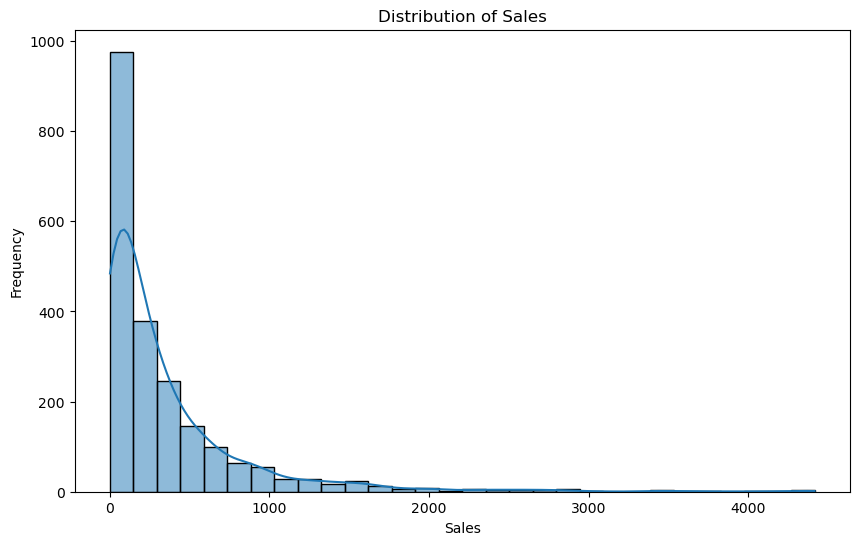

In [3]:
# Plot the distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

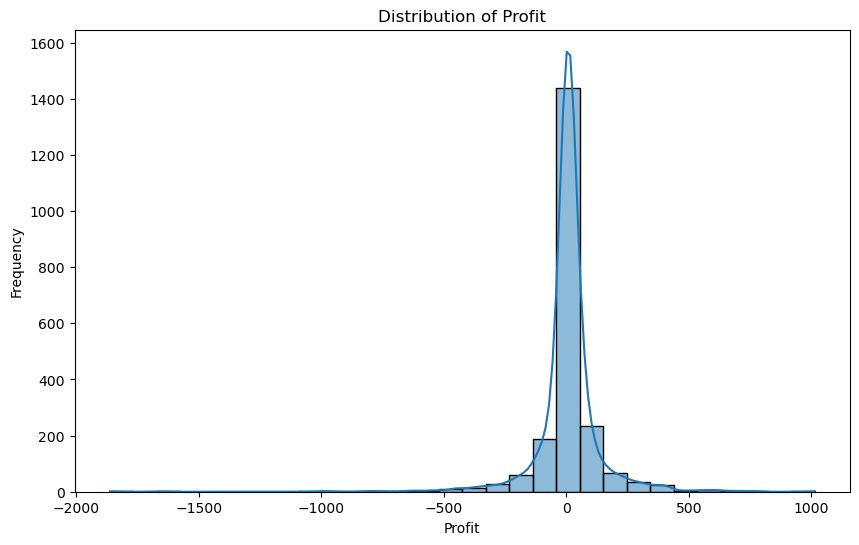

In [4]:
# Plot the distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], kde=True, bins=30)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

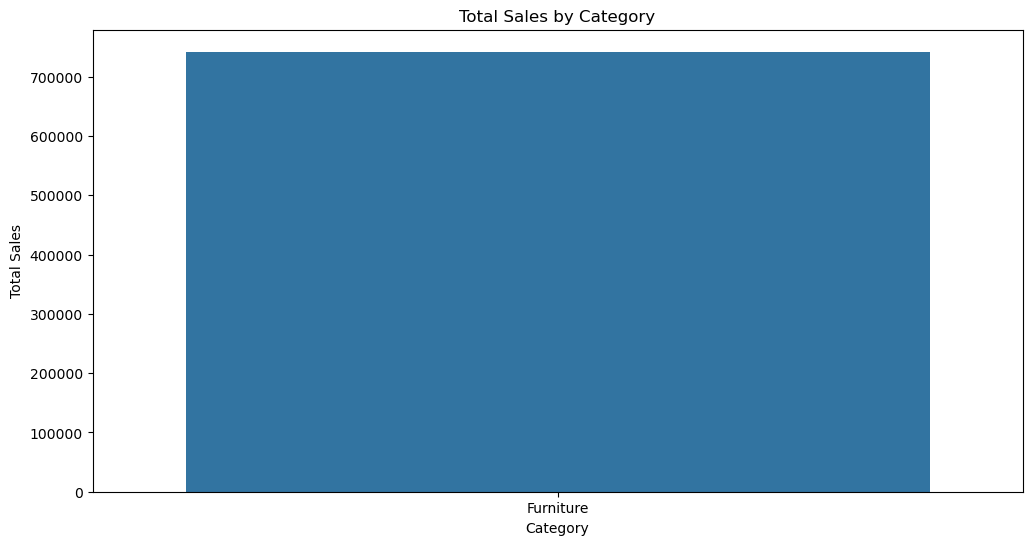

In [5]:
# Plot the total Sales and Profit by Category
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=category_sales_profit)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

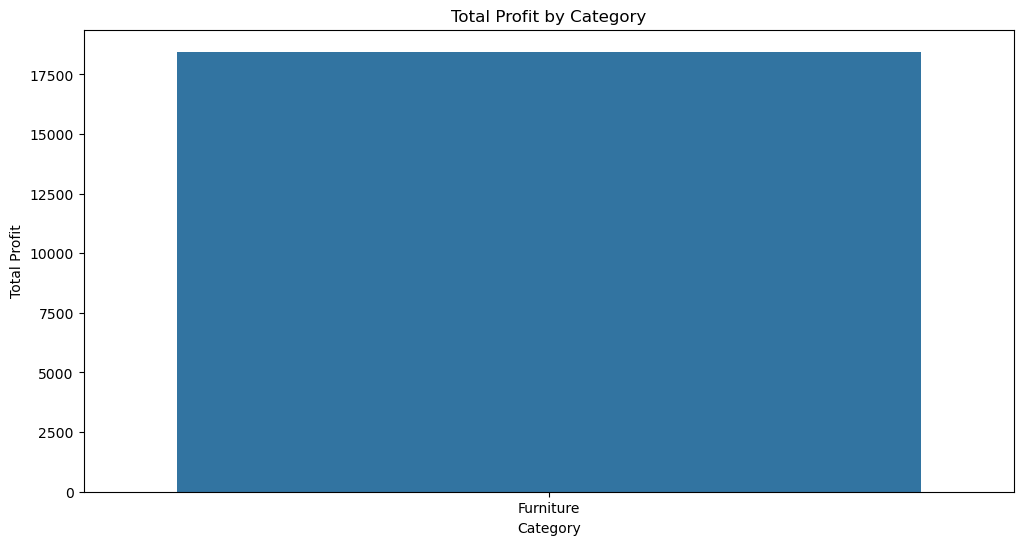

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=category_sales_profit)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

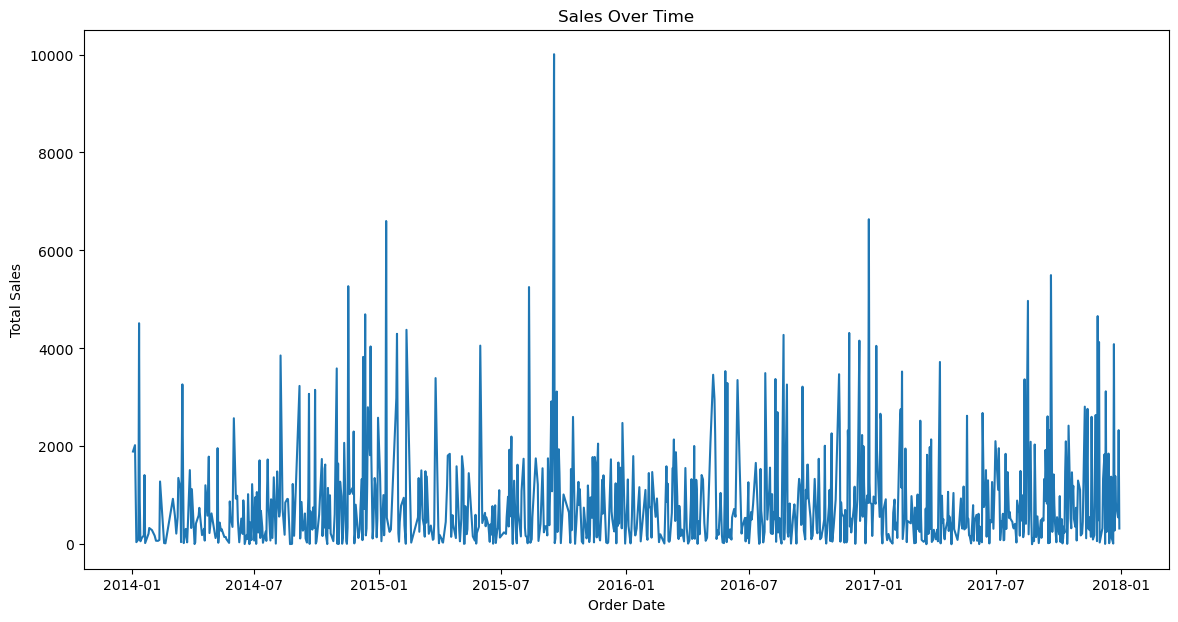

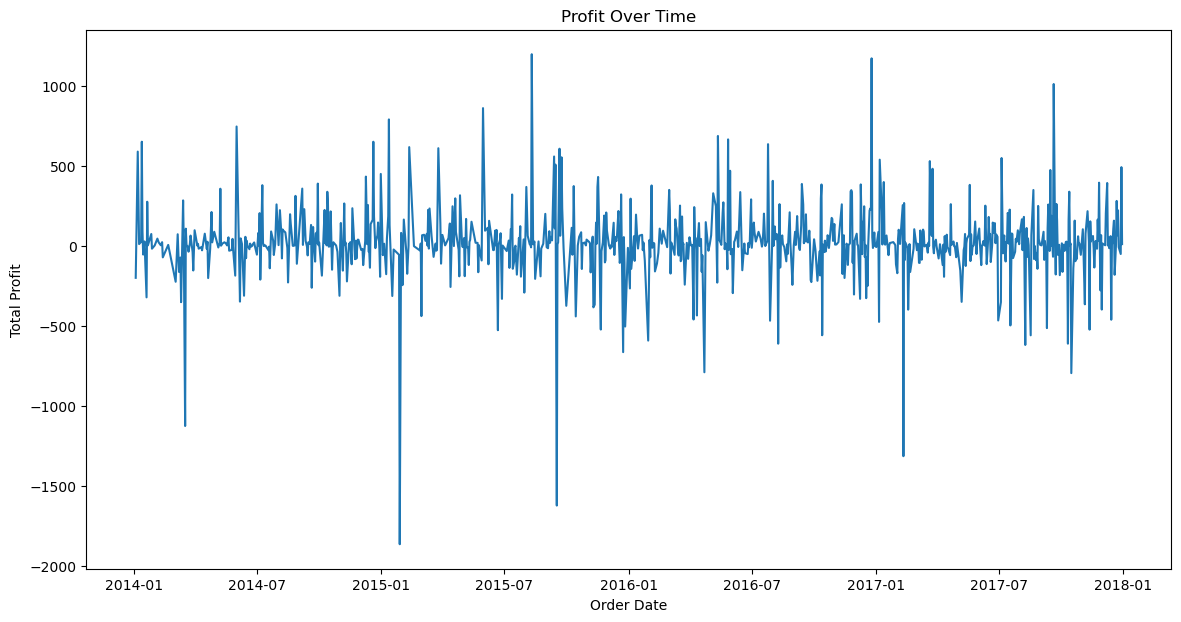

In [7]:
# Sales and Profit over Time
sales_profit_over_time = data.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Sales', data=sales_profit_over_time)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Profit', data=sales_profit_over_time)
plt.title('Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.show()

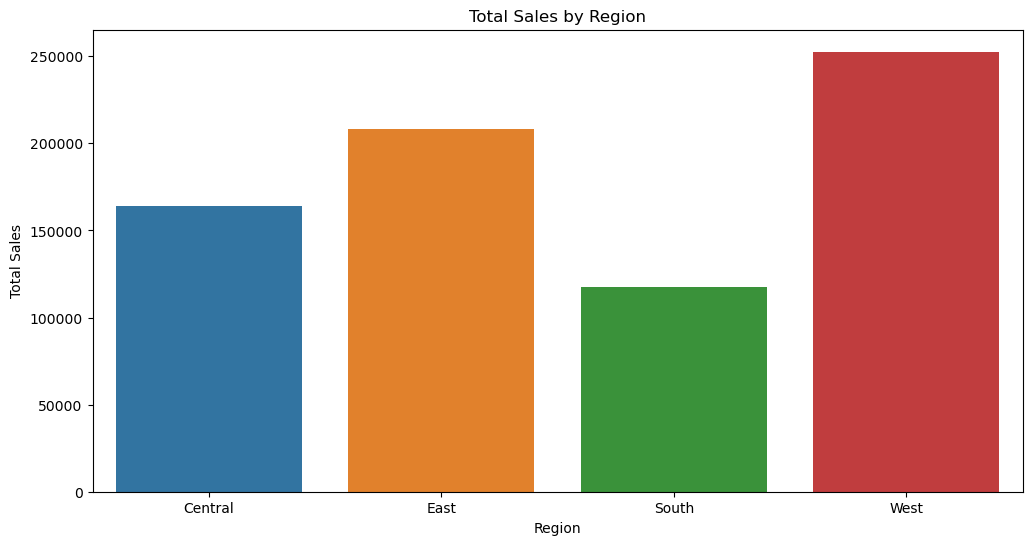

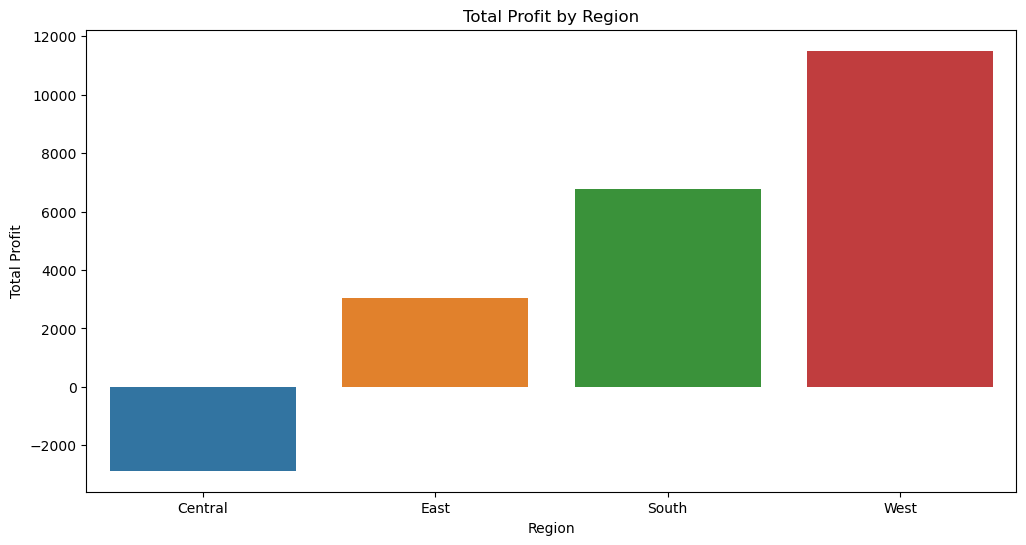

In [8]:
# Sales and Profit by Region
region_sales_profit = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_profit)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=region_sales_profit)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

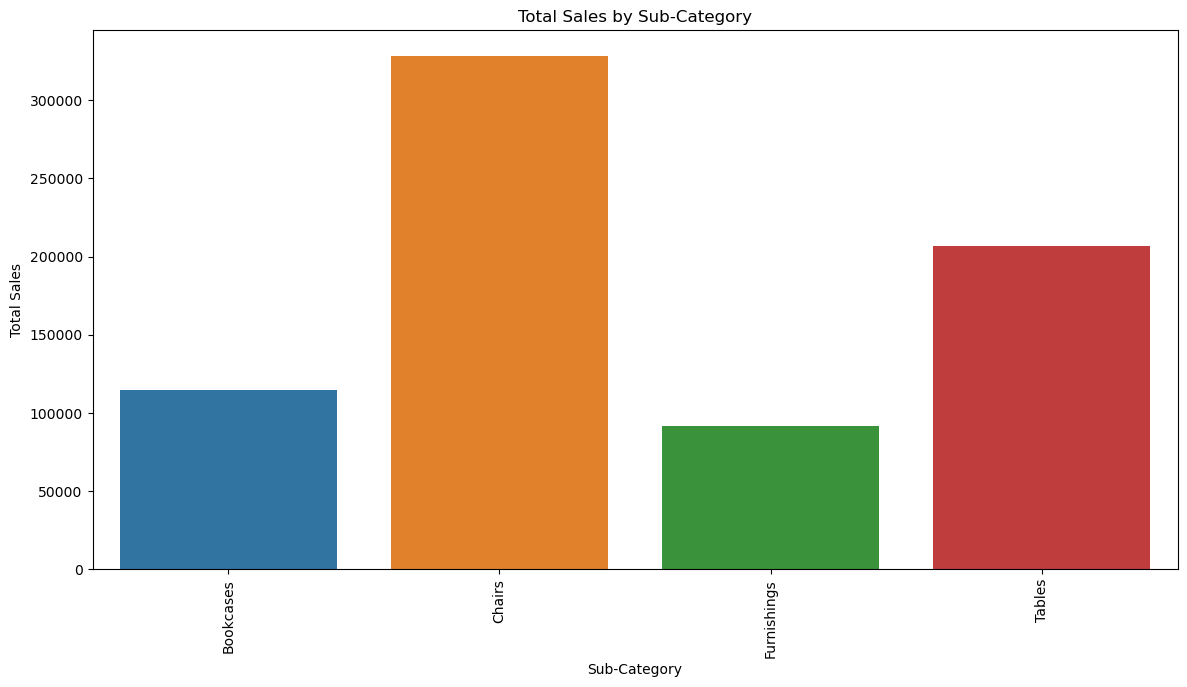

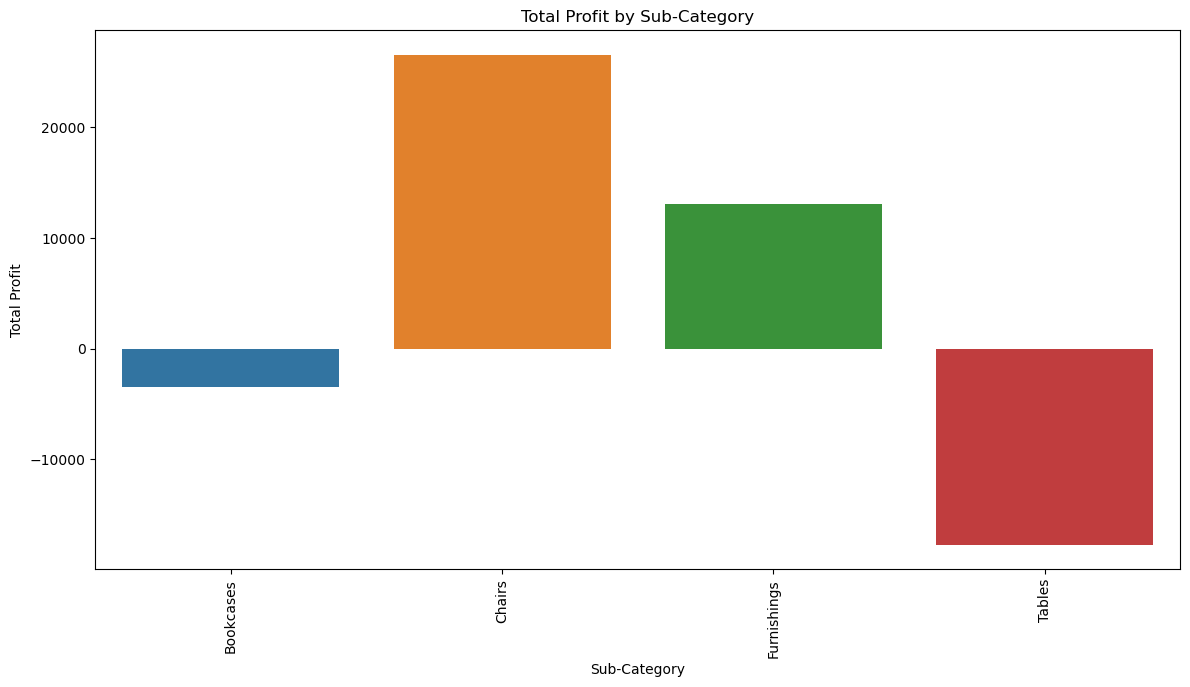

In [9]:
# Sales and Profit by Sub-Category
sub_category_sales_profit = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Sub-Category', y='Sales', data=sub_category_sales_profit)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Sub-Category', y='Profit', data=sub_category_sales_profit)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

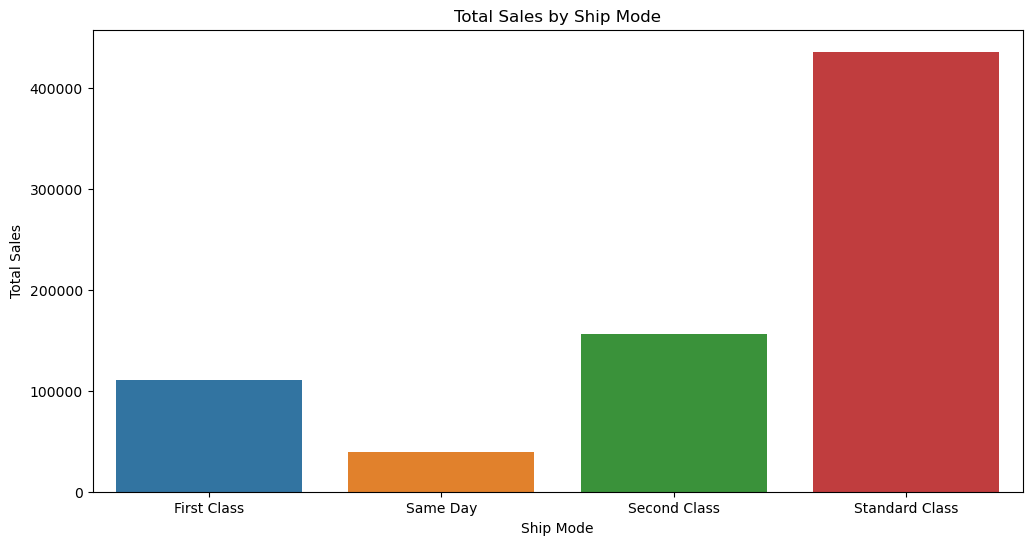

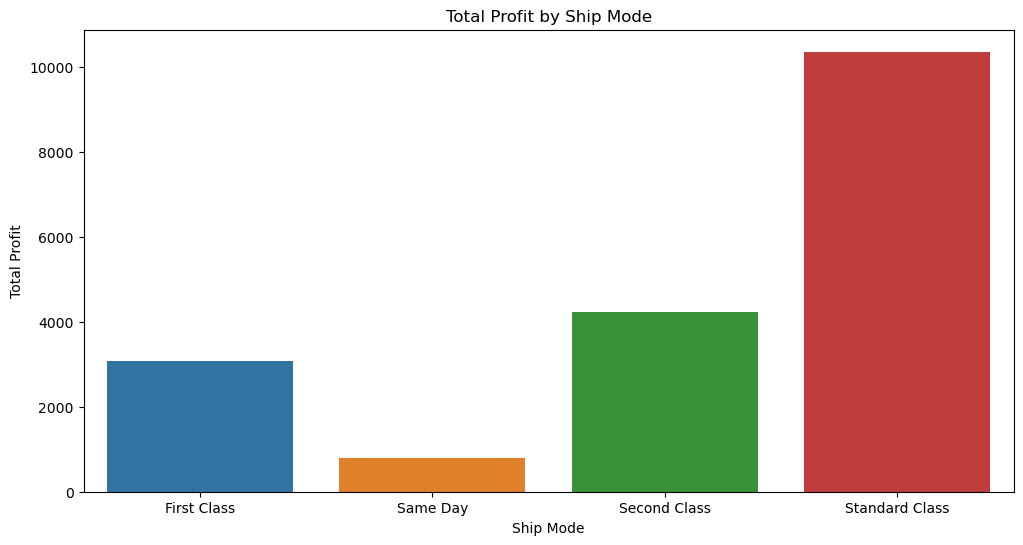

In [10]:
# Sales and Profit by Ship Mode
ship_mode_sales_profit = data.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Sales', data=ship_mode_sales_profit)
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Profit', data=ship_mode_sales_profit)
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.show()


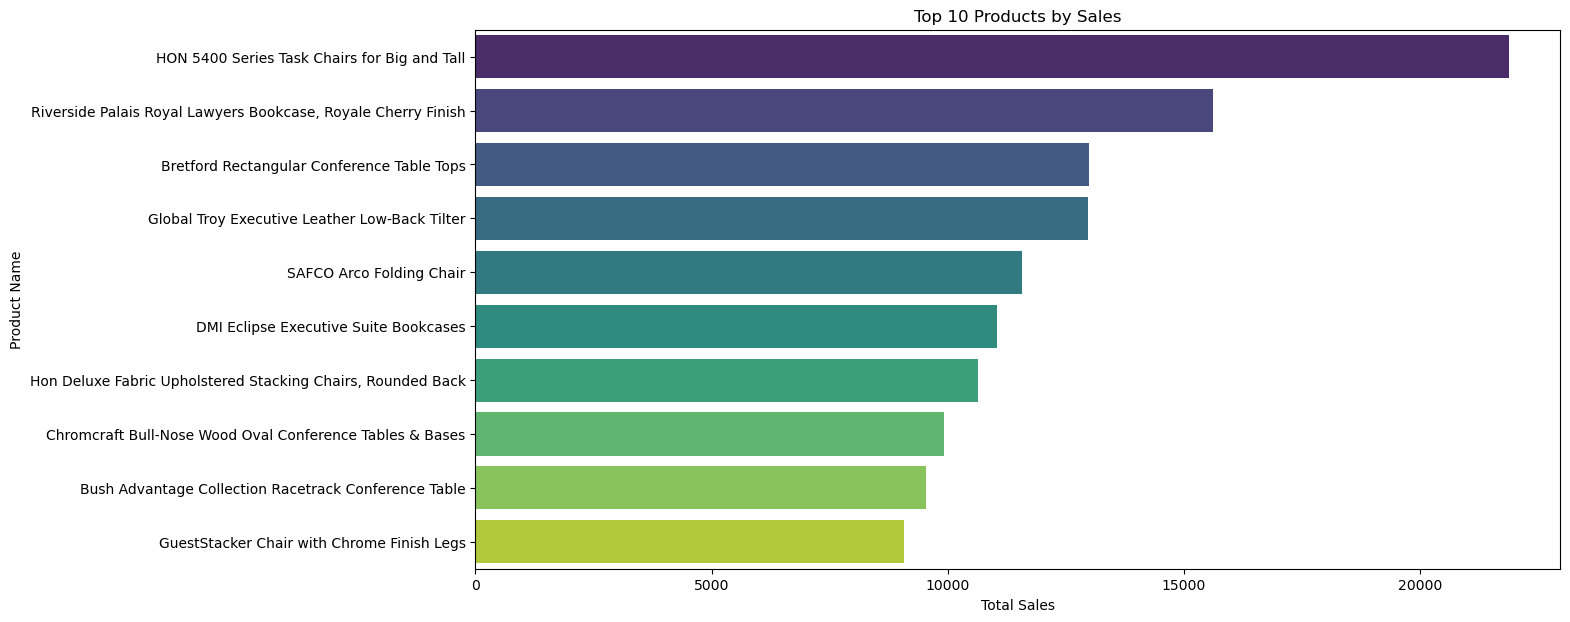

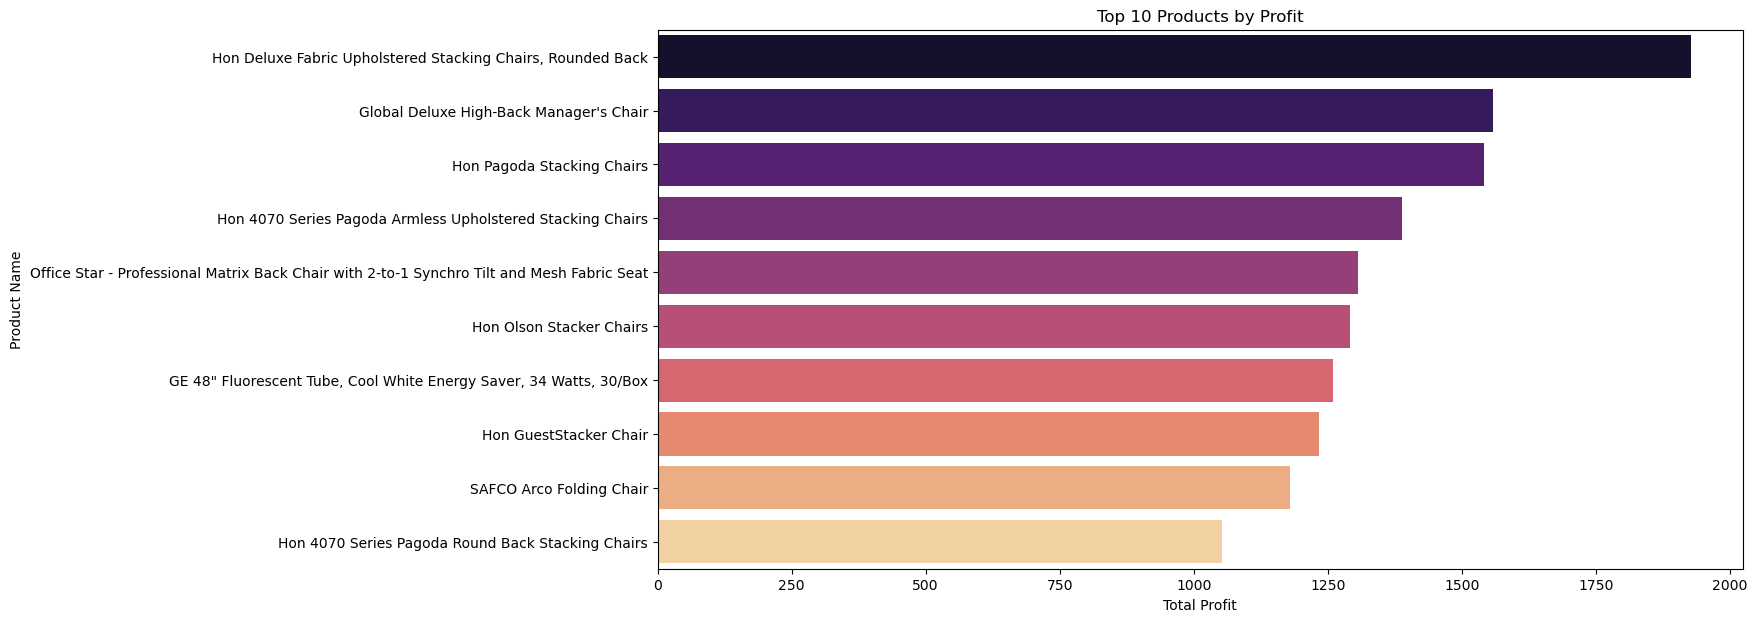

In [11]:
# Top 10 Products by Sales
top_10_products_sales = data.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Product Name', data=top_10_products_sales, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Top 10 Products by Profit
top_10_products_profit = data.groupby('Product Name')['Profit'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Product Name', data=top_10_products_profit, palette='magma')
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()


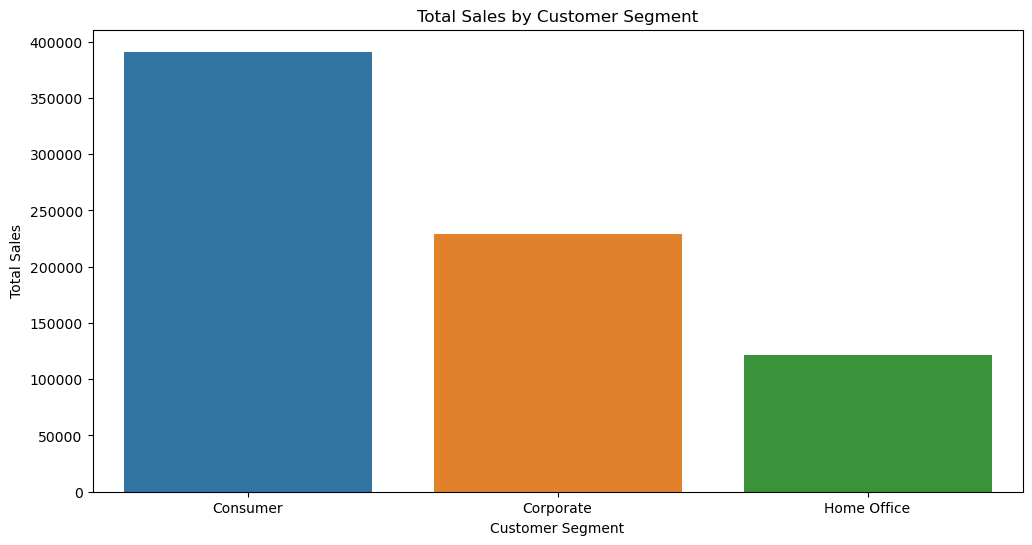

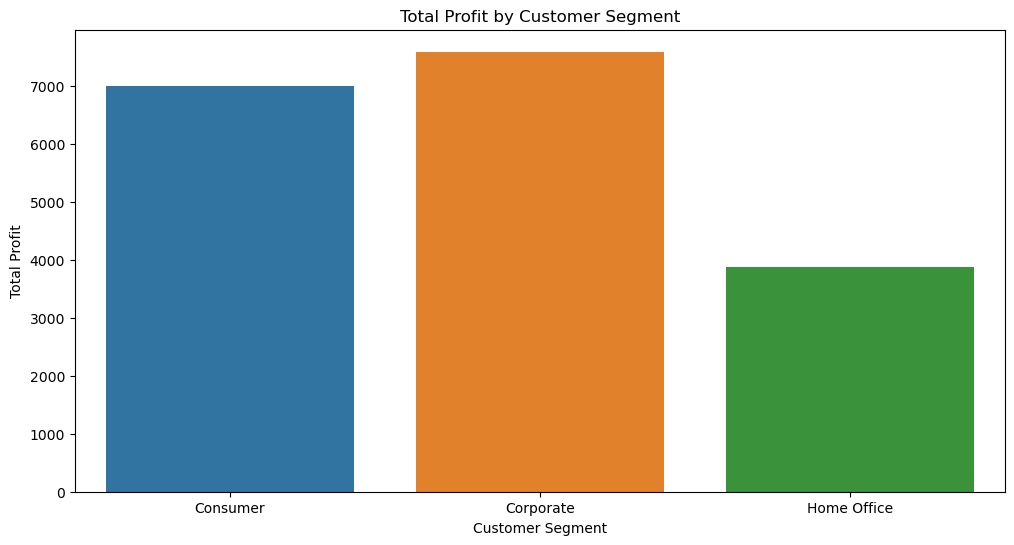

In [12]:
# Sales and Profit by Customer Segment
segment_sales_profit = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales_profit)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Profit', data=segment_sales_profit)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()


C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


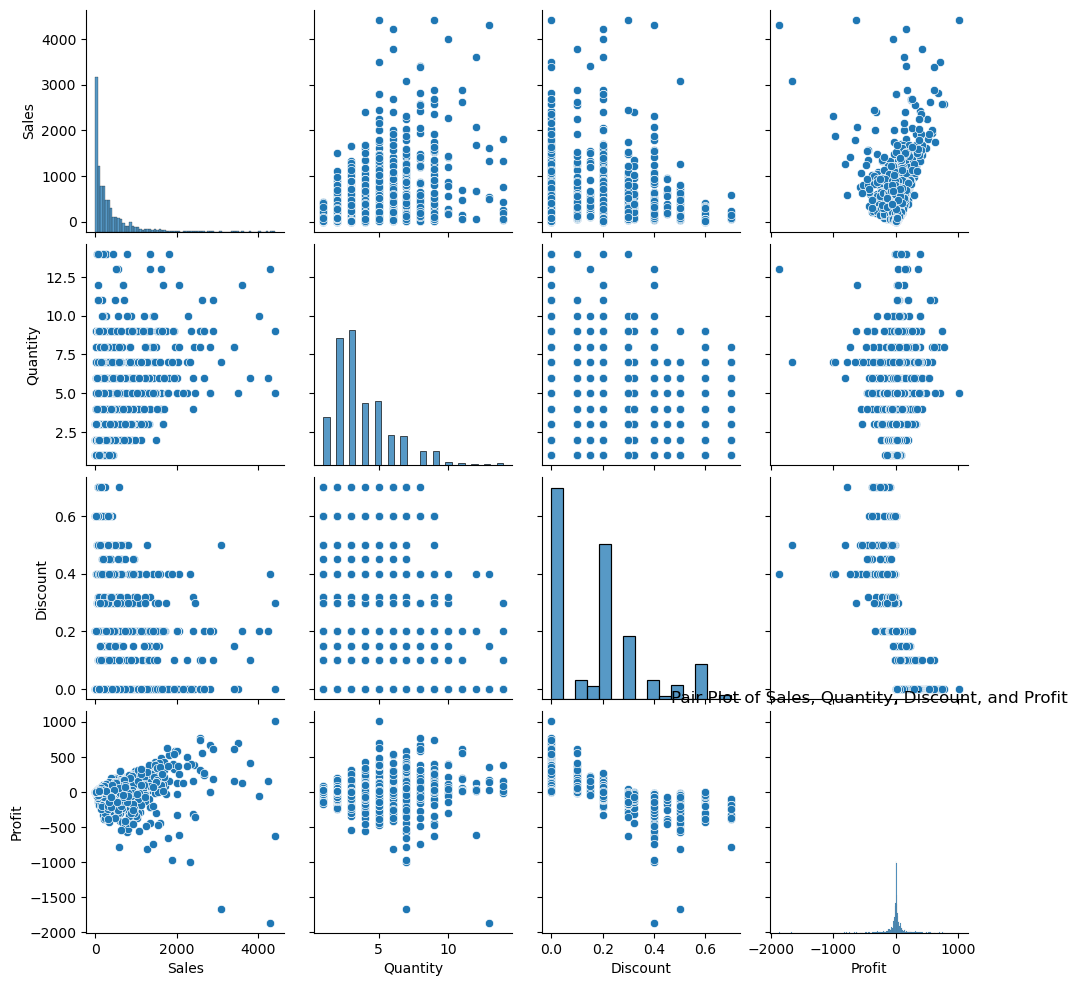

In [13]:
# Pair Plot
sns.pairplot(data[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.title('Pair Plot of Sales, Quantity, Discount, and Profit')
plt.show()


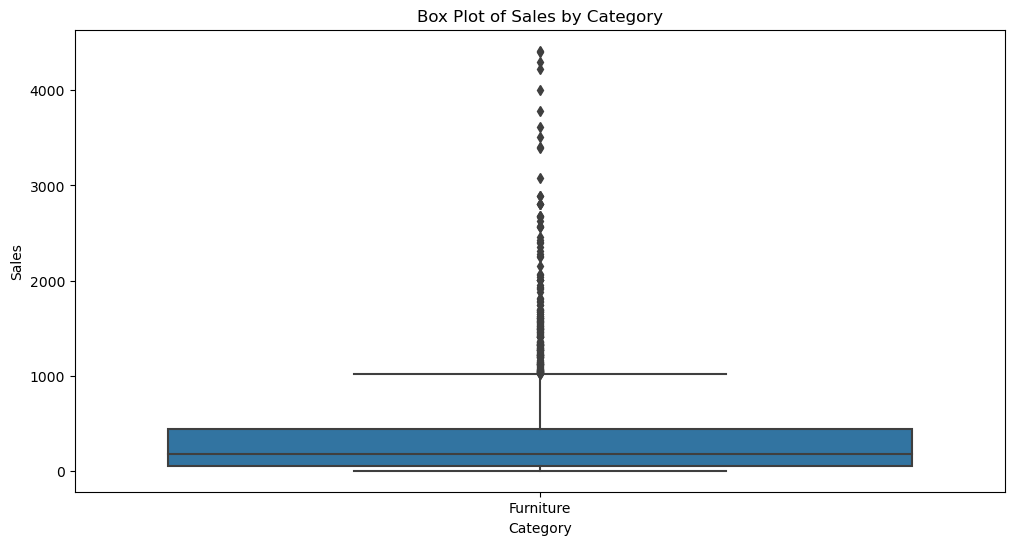

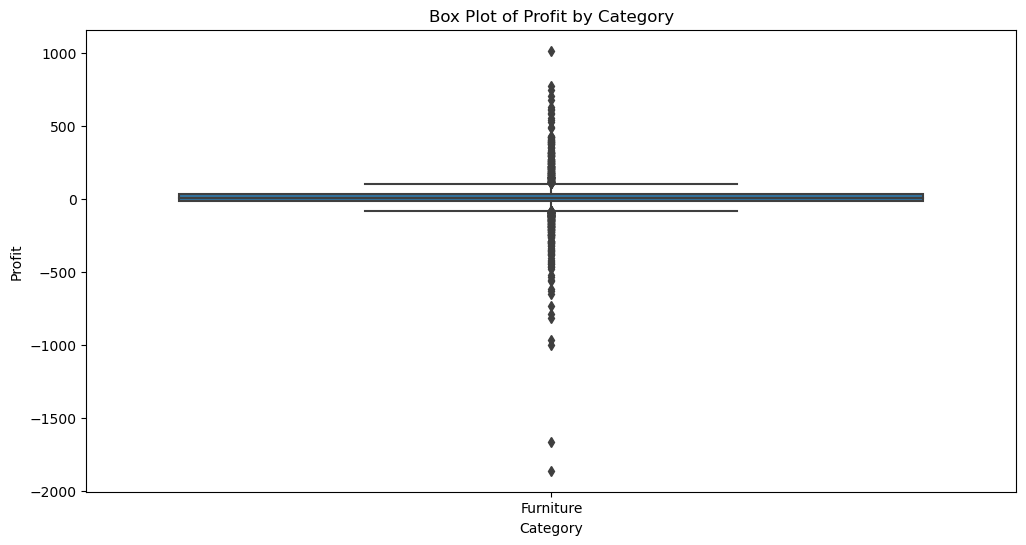

In [14]:
# Box Plot of Sales by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=data)
plt.title('Box Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Box Plot of Profit by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Profit', data=data)
plt.title('Box Plot of Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


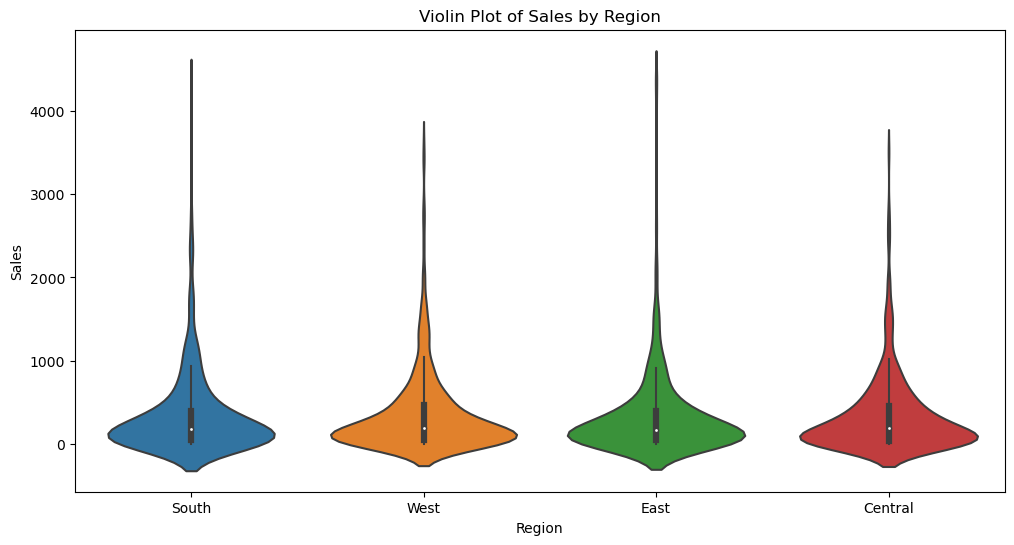

In [15]:
# Violin Plot of Sales by Region
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Sales', data=data)
plt.title('Violin Plot of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: Use

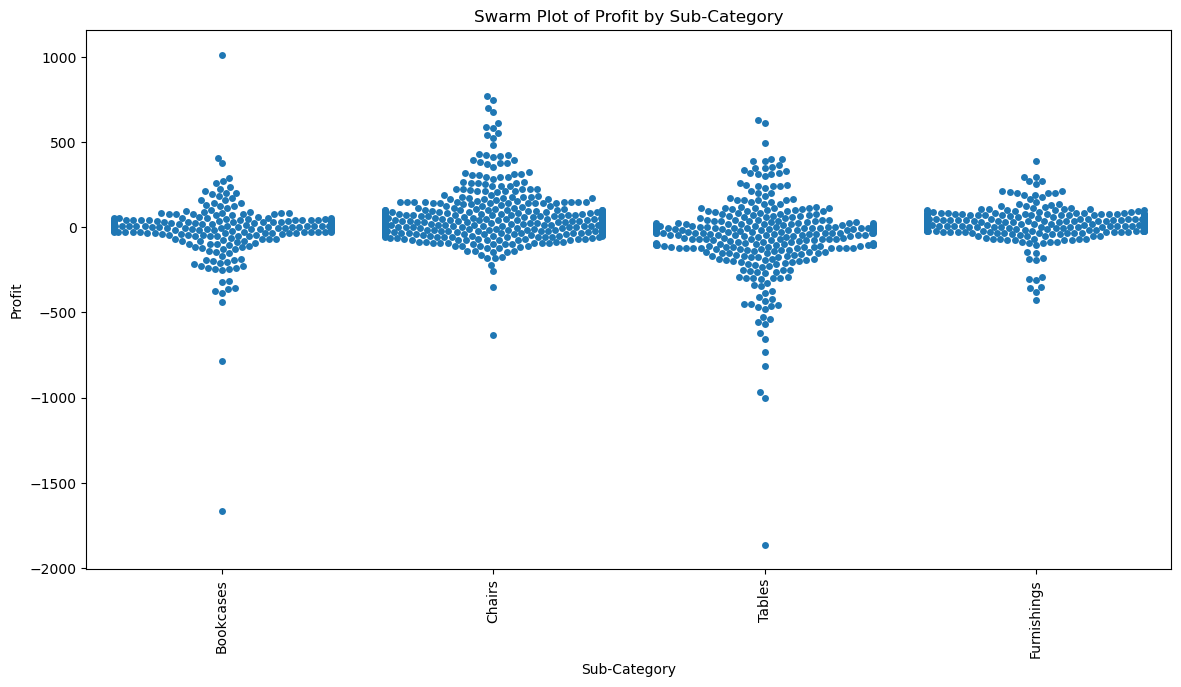

In [16]:
# Swarm Plot of Profit by Sub-Category
plt.figure(figsize=(14, 7))
sns.swarmplot(x='Sub-Category', y='Profit', data=data)
plt.title('Swarm Plot of Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()


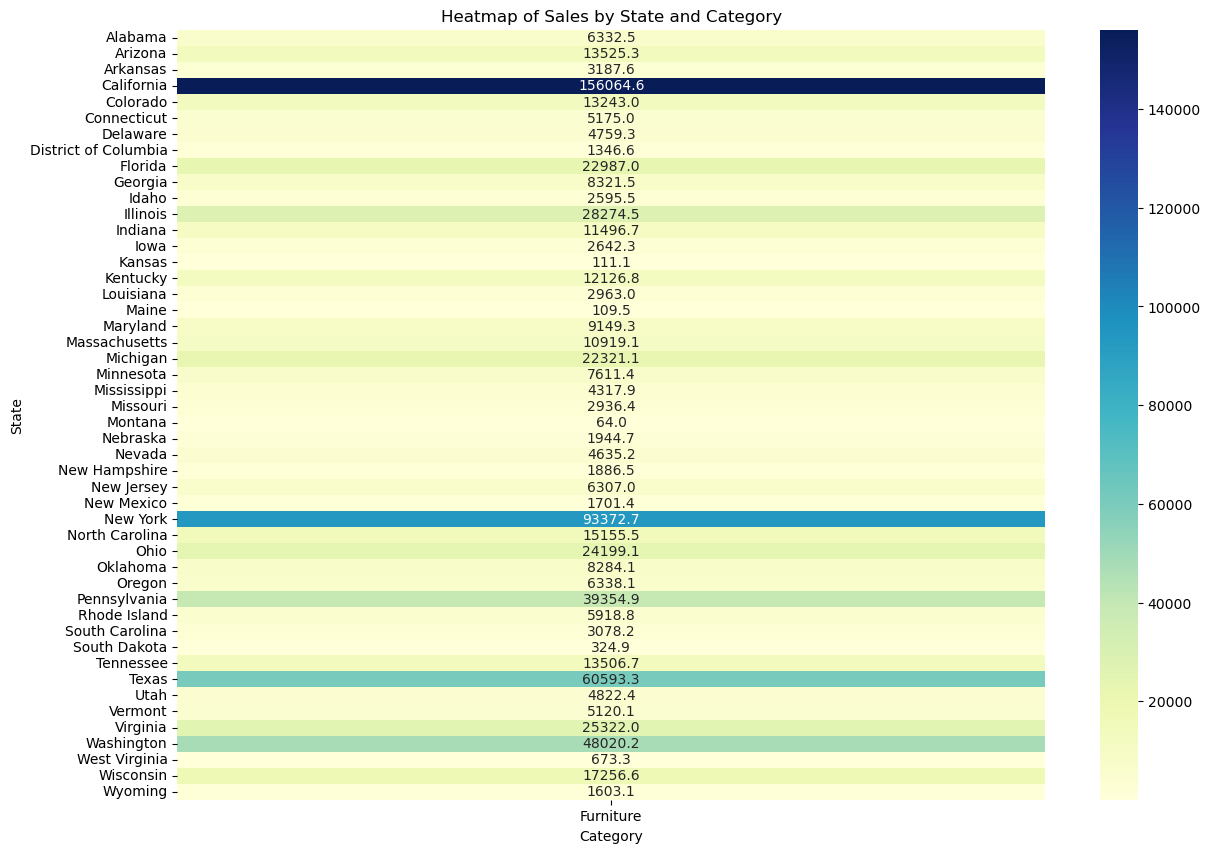

In [17]:
# Pivot table for heatmap
heatmap_data = data.pivot_table(values='Sales', index='State', columns='Category', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Heatmap of Sales by State and Category')
plt.xlabel('Category')
plt.ylabel('State')
plt.show()


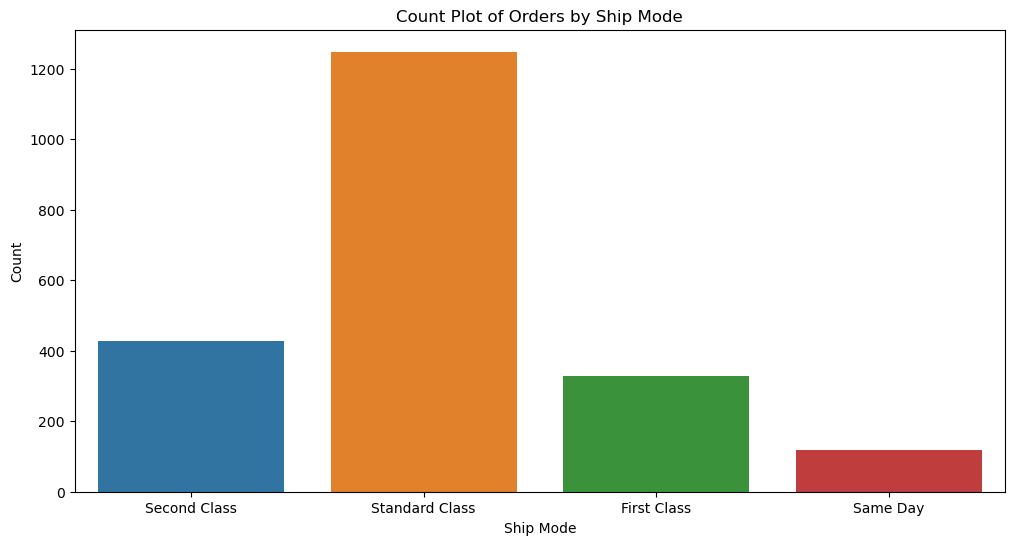

In [18]:
# Count Plot of Orders by Ship Mode
plt.figure(figsize=(12, 6))
sns.countplot(x='Ship Mode', data=data)
plt.title('Count Plot of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()


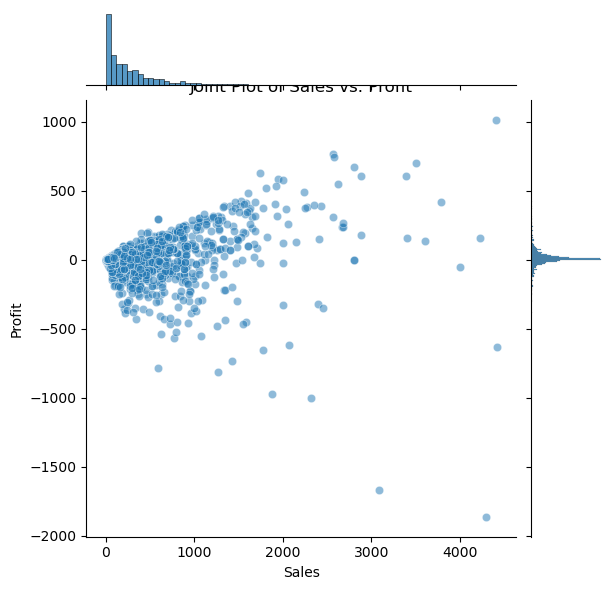

In [19]:
# Joint Plot of Sales vs. Profit
sns.jointplot(x='Sales', y='Profit', data=data, kind='scatter', alpha=0.5)
plt.title('Joint Plot of Sales vs. Profit')
plt.show()


In [20]:
# Extract useful date features
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Year'] = data['Ship Date'].dt.year

In [21]:
# Drop unnecessary columns
data.drop(columns=['Row ID', 'Order ID', 'Customer Name', 'Product Name'], inplace=True)

In [22]:
# Handle missing values separately for numerical and categorical features
numeric_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Order Month', 'Order Year', 'Ship Month', 'Ship Year']
categorical_features = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [23]:
# Fill missing values for numerical features with the median
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

In [24]:
# Fill missing values for categorical features with the mode
data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

In [25]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [26]:
# Standardize numerical features
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])


In [27]:
# Verify the final shape
print("Final data shape:", data_encoded.shape)

Final data shape: (2121, 442)


In [28]:
# Save the cleaned dataset to a CSV file
data_encoded.to_csv('cleaned_stores_sales_forecasting_simplified.csv', index=False)

In [29]:
# Display the cleaned dataset
data_encoded.head()

,Order Date,Ship Date,Customer ID,Country,Postal Code,Product ID,Sales,Quantity,Discount,Profit,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,2016-08-11,2016-11-11,CG-12520,United States,42420,FUR-BO-10001798,-0.174681,-0.792953,-0.958228,0.244192,...,False,False,False,False,False,True,False,False,False,False
1,2016-08-11,2016-11-11,CG-12520,United States,42420,FUR-CH-10000454,0.759561,-0.348723,-0.958228,1.550412,...,False,False,False,False,False,True,False,True,False,False
2,2015-11-10,2015-10-18,SO-20335,United States,33311,FUR-TA-10000577,1.208090,0.539736,1.521050,-2.880006,...,False,False,False,False,False,True,False,False,False,True
3,2014-09-06,2014-06-14,BH-11710,United States,90032,FUR-FU-10001487,-0.598288,1.428194,-0.958228,0.040216,...,False,False,False,False,False,False,True,False,True,False
4,2014-09-06,2014-06-14,BH-11710,United States,90032,FUR-TA-10001539,2.696195,2.316653,0.143673,0.563237,...,False,False,False,False,False,False,True,False,False,True
